In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

2025-03-12 22:55:28.756335: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2025-03-12 22:55:28.766273: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-03-12 22:55:28.766339: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4070 Ti computeCapability: 8.9
coreClock: 2.61GHz coreCount: 60 deviceMemorySize: 11.70GiB deviceMemoryBandwidth: 469.43GiB/s
2025-03-12 22:55:28.766443: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-03-12 22:55:28.767382: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-03-12 22:55:28.768420: I tensorflow/stream_executor/

In [ ]:
import os
import numpy as np
from SynthSeg.predict import predict

# Path to the sample test image (usually in the data or example folders)
# You may need to adjust this path based on the exact location in the repo
input_path = 'data/nii_images/NINS_Dataset.nii.gz'  

# Path to the pre-trained model provided with SynthSeg
model_path = 'models/synthseg_robust_2.0.h5'  # Adjust if needed

# Output path for the segmentation
output_path = 'results/NINS_Dataset_Segmentaion.nii.gz'

# Run prediction
predict(path_images=input_path,
        path_model=model_path,
        path_segmentations=output_path, 
        labels_segmentation=None,
        verbose=True)

Using TensorFlow backend.
2025-03-12 22:55:29.676576: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2025-03-12 22:55:29.680472: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2995200000 Hz
2025-03-12 22:55:29.681199: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2d1343b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-03-12 22:55:29.681208: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-03-12 22:55:29.719929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-03-12 22:55:29.720059: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2cfeb7e0 initialized for platform CU

predicting 1/1


2025-03-12 22:55:30.983820: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2025-03-12 22:56:51.830067: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-03-12 22:57:23.594851: W tensorflow/core/common_runtime/bfc_allocator.cc:311] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2025-03-12 22:57:23.786877: W tensorflow/core/common_runtime/bfc_allocator.cc:245] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_coun

In [3]:
print(np.load('data/tutorial_7/segmentation_labels_s1.npy'))

[0 3 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 3 4 4 1 1 1 1 2 2 1 1 1 0 3 3 1
 2 3 3 4 4 1 1 1 1 2 2 1 1 1 0 3 3]


In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
original_data = nib.load('data/tutorial_7/target_segmentations_d/0001.nii.gz').get_fdata()
segmented_data = nib.load('results/sample_segmentation.nii.gz').get_fdata()

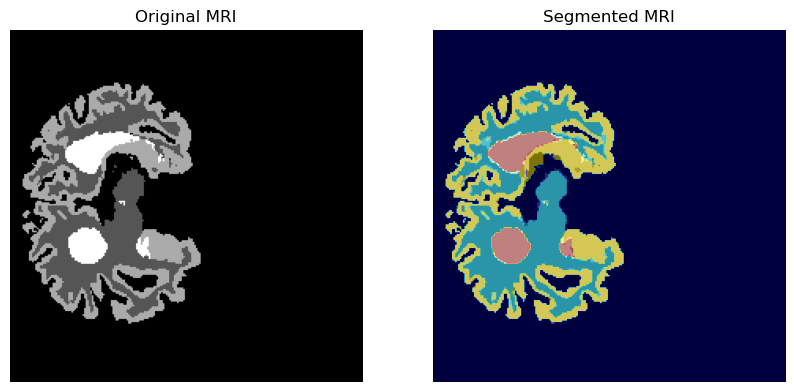

In [8]:
slice_idx = original_data.shape[2] // 2  # Choose middle slice

# Plot original and segmented MRI slices
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_data[:, :, slice_idx], cmap="gray")
axes[0].set_title("Original MRI")
axes[0].axis("off")

axes[1].imshow(original_data[:, :, slice_idx], cmap="gray")  # Show original in background
axes[1].imshow(segmented_data[:, :, slice_idx], cmap="jet", alpha=0.5)  # Overlay segmentation
axes[1].set_title("Segmented MRI")
axes[1].axis("off")
plt.show()


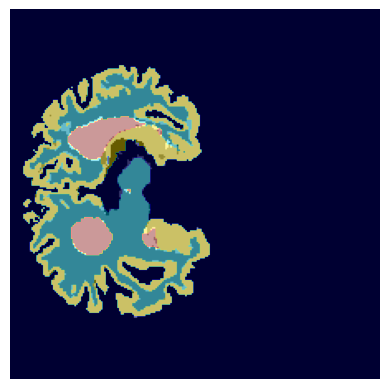

In [9]:
plt.imshow(original_data[:, :, slice_idx], cmap="gray")
plt.imshow(segmented_data[:, :, slice_idx], cmap="jet", alpha=0.4)  # Adjust alpha for transparency
plt.axis("off")
plt.show()

In [ ]:
import h5py
